┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


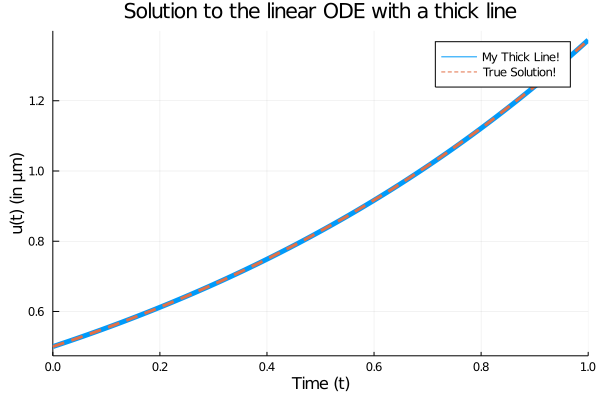

In [49]:
using DifferentialEquations
f(u,p,t) = 1.01*u
u0=1/2
tspan = (0.0,1.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
using Plots
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false
plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

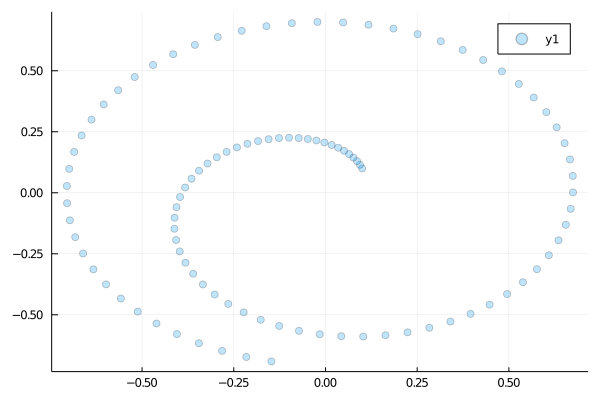

In [103]:
using DifferentialEquations
using Plots

function Hopf2D(du, u, p, t)
    μ, ω, A = p
    du[1] = μ*u[1] - ω*u[2] - A*u[1]*(u[1]^(2) + u[2]^(2))
    du[2] = μ*u[2] + ω*u[1] - A*u[2]*(u[1]^(2) + u[2]^(2))
end




# Define the experimental parameter
tspan = (0.0f0, 10.0f0)
u0 = Float32[0.1, 0.1]
p_ = Float32[0.5, 1, 1]


prob = ODEProblem(Hopf2D, u0,tspan, p_)

solution = solve(prob, Vern7(), abstol=1e-12, reltol=1e-12, saveat = 0.1)


y = []
x = []
for i = 1:length(solution.u)
    push!(y, solution.u[i][2])
    push!(x, solution.u[i][1])
end

scatter(x,y, alpha = 0.25)


#scatter(x, y, alpha = 0.25)
#plot!(solution[1], alpha = 0.5)